# **CS224W - Colab 1**

In this Colab, you will write a pipeline for **learning node embeddings** in a graph. You will go through the following 3 steps:

1.   To start, you will load the familiar [Karate Club Network](https://en.wikipedia.org/wiki/Zachary%27s_karate_club) from Colab 0. You will explore multiple graph statistics over this graph.
2.   You will then work to transform the graph structure into a PyTorch tensor so that you can perform machine learning over the graph.

3. Finally, you will write your first graph learning algorithm: a node embedding model. For simplicity, your model is simpler than the DeepWalk and node2vec algorithms taught in Module 1, Unit 1.2 - Node Embeddings. Nevertheless, it will still be rewarding and challenging, as you will write the whole procedure from scratch via PyTorch.

Let's get started!

**Note**: Make sure to **sequentially run all the cells** so that the intermediate variables / packages will carry over to the next cell

## Building + Debugging Notes
While working through this Colab and future Colabs, we strongly encourage you to follow a couple of building / debugging strategies:
- During debugging make sure to run your notebook using the CPU runtime. You can change the notebook runtime by selecting `Runtime` and then `Change runtime type`. From the dropdown, select `None` as the `hardware accelerator`.
- When working with PyTorch and Neural Network models, understanding the shapes of different tensors, especially the input and output tensors is incredibly helpful.
- When training models, it is helpful to start by only running 1 epoch or even just a couple of batch iterations. This way you can check that all your tensor shapes and logic match up, while also tracking expected behavior, such as a decreasing training loss. Remember to comment out / save the default number of epochs that we provide you.


# 1) Graph Basics
To start, load the [Karate Club Network](https://en.wikipedia.org/wiki/Zachary%27s_karate_club), a classical graph in network science. As discussed in the introduction, you will begin by exploring multiple graph statistics for this graph.

## Setup
As introduced in Colab 0, NetworkX is a powerful package for storing and manipluating graphs. We will heavily rely on NetworkX throughout this Colab.

In [ ]:
import networkx as nx
import os

## Zachary's karate club network

The [Karate Club Network](https://en.wikipedia.org/wiki/Zachary%27s_karate_club) is a social network graph of 34 members of a karate club, where links exist between members who have interacted outside the club.

In [ ]:
G = nx.karate_club_graph()

# G is an undirected graph
type(G)

networkx.classes.graph.Graph

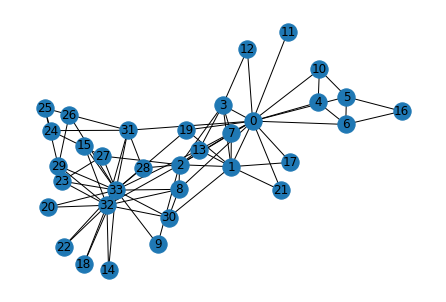

In [ ]:
# Visualize the graph
if 'IS_GRADESCOPE_ENV' not in os.environ:
  nx.draw(G, with_labels = True)

## Question 1: What is the average degree of the karate club network? (1 Points)

In [ ]:
def average_degree(num_edges, num_nodes):
  # TODO: Implement a function that takes the number of edges
  # and number of nodes of a graph and returns the average node degree of 
  # the graph. Round the result to nearest integer (for example 
  # 3.3 will be rounded to 3 and 3.7 will be rounded to 4).

  avg_degree = 0

  ############# Your code here ############
  ## Note: 
  ## 1: Do not import any other Python package
  ## 2: Do not use any function from NetworkX
  avg_degree = num_edges / num_nodes *2
  avg_degree = round(avg_degree)
  #########################################

  return avg_degree

if 'IS_GRADESCOPE_ENV' not in os.environ:
  num_edges = G.number_of_edges()
  num_nodes = G.number_of_nodes()
  avg_degree = average_degree(num_edges, num_nodes)
  print("Average degree of karate club network is {}".format(avg_degree))

Average degree of karate club network is 2


## Question 2: What is the average clustering coefficient of the karate club network? (1 Points)

In [ ]:
def average_clustering_coefficient(G):
  # TODO: Implement a function that takes a nx.Graph
  # and returns the average clustering coefficient. Round 
  # the result to 2 decimal places (for example 3.333 will
  # be rounded to 3.33 and 3.7571 will be rounded to 3.76)

  avg_cluster_coef = 0

  ############# Your code here ############
  ## Note: 
  ## 1: Please use the appropriate NetworkX clustering function
  ## https://networkx.org/documentation/stable/reference/algorithms/clustering.html
  for n in G.nodes():
    avg_cluster_coef = round(nx.average_clustering(G), 2)
  
  pass
  #########################################

  return avg_cluster_coef

if 'IS_GRADESCOPE_ENV' not in os.environ:
  avg_cluster_coef = average_clustering_coefficient(G)
  print("Average clustering coefficient of karate club network is {}".format(avg_cluster_coef))

Average clustering coefficient of karate club network is 0.57


## Question 3: What is the PageRank value for node 0 (node with id 0) after one PageRank iteration? (5 Points)

Please complete the code block by implementing the PageRank equation: $r_j^{t+1} = [\sum_{i \rightarrow j} \beta \frac{r_i^t}{d_i}] + (1 - \beta) \frac{1}{N}$ to update the PageRank value of an arbitrary node j for the first time step $t = 0 \rightarrow t = 1$.

**NOTE:** $r_j^0 = 1 / |G|$ for all nodes j (where $|G|$ is the number of nodes in the graph). Namely, at $t=0$ every node is initialized with the same PageRank value.

In [ ]:
def one_iter_pagerank(G, beta, r0, node_id):
  # TODO: Implement a function that takes as input a nx.Graph, beta, r0 
  # and node_id. Then for the given node_id = j, compute rj_1 as 
  # the PageRank of the input node j at time t = 1 (i.e. after ONE iteration). 
  # 
  # Round the result to 2 decimal places (for example 3.333 will
  # be rounded to 3.33 and 3.7571 will be rounded to 3.76)
  #
  # NOTE: rj_0 = r0 for every node j (i.e. each node is initialized with 
  # the same PageRank value at t = 0; thus we do not need an initial PageRank
  # vector r).

  rj_1 = 0

  ############# Your code here ############
  ## Note: 
  ## 1: You should not use nx.pagerank!
  pass
  #########################################

  return rj_1

if 'IS_GRADESCOPE_ENV' not in os.environ:
  beta = 0.8
  r0 = 1 / G.number_of_nodes()
  node = 0
  r0_1 = one_iter_pagerank(G, beta, r0, node)
  print("The PageRank value for node 0 after one iteration is {}".format(r0_1))

The PageRank value for node 0 after one iteration is 0


## Question 4: What is the (raw) closeness centrality for the node with id=5 in the karate club network? (1 Points)

The equation for closeness centrality is $c(v) = \frac{1}{\sum_{u \neq v}\text{shortest path length between } u \text{ and } v}$. Remember that we want the raw (unnormalized) closeness centrality from Module 1, Unit 1.1 - Traditional Feature Based Methods.

In [ ]:
def closeness_centrality(G, node=5):
  # TODO: Implement a function that calculates closeness centrality 
  # for a node in the karate club network. G is the input karate club 
  # network and 'node' is the node id of the node that we are interested
  # in. Please round the closeness centrality result to 2 decimal places.

  closeness = 0

  ############# Your code here ############
  ## Note:
  ## 1: You can use networkx closeness centrality function.
  ## 2: Notice that networkx closeness centrality returns the normalized 
  ## closeness directly, which is different from the raw (unnormalized) 
  ## one that we learned in the lecture.


  # closeness = nx.closeness_centrality(G, u=node, distance=None, wf_improved=False)
  # closeness = closeness / (G.degree[node]-1) 
  # closeness = round(closeness, 2)

  s = 0
  for n in G.nodes():
    if not n == node:
      ln = len(nx.shortest_path(G, source=node, target=n))
      s+=ln

  closeness = round(1/s, 2)

  pass
  #########################################

  return closeness

if 'IS_GRADESCOPE_ENV' not in os.environ:
  node = 5
  closeness = closeness_centrality(G, node=node)
  print("The karate club network has closeness centrality {}".format(closeness))

The karate club network has closeness centrality 0.01


# 2) Graph to Tensor
Now, you will work to transform the graph $G$ into a PyTorch tensor, so that you can perform machine learning over the graph.

## Setup
Check if PyTorch is properly installed

In [ ]:
import torch
print(torch.__version__)

1.10.0+cu111


## PyTorch tensor basics

Generate PyTorch tensor with all zeros, ones or random values.

In [ ]:
# Generate 3 x 4 tensor with all ones
ones = torch.ones(3, 4)
print(ones)

# Generate 3 x 4 tensor with all zeros
zeros = torch.zeros(3, 4)
print(zeros)

# Generate 3 x 4 tensor with random values on the interval [0, 1)
random_tensor = torch.rand(3, 4)
print(random_tensor)

# Get the shape of the tensor
print(ones.shape)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[0.2745, 0.3012, 0.8590, 0.1073],
        [0.8772, 0.7296, 0.3932, 0.0925],
        [0.3967, 0.0278, 0.6224, 0.7974]])
torch.Size([3, 4])


PyTorch tensors contains elements for a single data type, the `dtype`.

In [ ]:
# Create a 3 x 4 tensor with all 32-bit floating point zeros
zeros = torch.zeros(3, 4, dtype=torch.float32)
print(zeros.dtype)

# Change the tensor dtype to 64-bit integer
zeros = zeros.type(torch.long)
print(zeros.dtype)

torch.float32
torch.int64


## Question 5: Get the edge list of the karate club network and transform it into `torch.LongTensor`. What is the `torch.sum` value of the `pos_edge_index` tensor? (2 Points)

In [ ]:
def graph_to_edge_list(G):
  # TODO: Implement a function that returns the edge list of
  # a nx.Graph. The returned edge_list should be a list of tuples
  # where each tuple represents an edge between two nodes.

  edge_list = []

  ############# Your code here ############
  ## Note:
  ## Try to use simple networkx functions.def graph_to_edge_list(G):
  # TODO: Implement a function that returns the edge list of
  # a nx.Graph. The returned edge_list should be a list of tuples
  # where each tuple represents an edge between two nodes.

  edge_list = []

  ############# Your code here ############
  ## Note:
  ## Try to use simple networkx functions.
  edge_list = list(G.edges())
  pass
  #########################################

  return edge_list

def edge_list_to_tensor(edge_list):
  # TODO: Implement a function that transforms an edge_list to a
  # tensor. The input edge_list is a list of tuples and the resulting
  # tensor should have the shape [2 x len(edge_list)].

  edge_index = torch.tensor([])

  ############# Your code here ############
  edge_index = torch.tensor(edge_list, dtype = torch.long).permute((1,0))
  pass
  #########################################

  return edge_index

if 'IS_GRADESCOPE_ENV' not in os.environ:
  pos_edge_list = graph_to_edge_list(G)
  pos_edge_index = edge_list_to_tensor(pos_edge_list)
  print("The pos_edge_index tensor has shape {}".format(pos_edge_index.shape))
  print("The pos_edge_index tensor has sum value {}".format(torch.sum(pos_edge_index)))

The pos_edge_index tensor has shape torch.Size([78, 2])
The pos_edge_index tensor has sum value 2535


## Question 6: Implement a function that samples negative edges. A negative edge exists between nodes $u$ and $v$ if there is no edge between $u$ and $v$ in the original graph.

## Then, write a short function to answer which edges (edge_1 - edge_5) can be negative edges in the karate club network? (7.5 Points)

In [38]:
import random

def sample_negative_edges(G, num_neg_samples):
  # TODO: Implement a function that returns a list of RANDOM negative edges.
  # The number of sampled negative edges is num_neg_samples. You do not
  # need to consider the corner case when the number of possible negative edges
  # is less than num_neg_samples. It should be ok as long as your implementation 
  # works on the karate club network. 
  # 
  # In this implementation, self loops should not be considered as
  # either positive or negative edge. Also, notice that 
  # the karate club network is an undirected graph; if (0, 1) is a positive 
  # edge, do you think (1, 0) can be a negative one?

  # Set the random number generator seed
  random.seed(1)

  neg_edge_list = []

  ############# Your code here ############
  ## NOTE:
  ## Remeber to sample negative edges randomly!
  neg_edge_list  = list(nx.non_edges(G))
  neg_id = random.sample( range(0, len(neg_edge_list)), num_neg_samples)
  neg_edge_list = [neg_edge_list[id] for id in neg_id]
  pass
  #########################################

  return neg_edge_list

def check_negative_edge(G, edge):
  # TODO: Implement a function that returns whether a given edge 
  # is a negative edge within the graph G.

  is_negative_edge = False

  ############# Your code here ############
  ## NOTE:
  ## Check the definition of a negative edge from the question.
  neg_edge_list  = list(nx.non_edges(G))
  if edge in neg_edge_list:
    is_negative_edge =True
  pass
  #########################################

  return is_negative_edge

if 'IS_GRADESCOPE_ENV' not in os.environ:
  # Sample 78 negative edges
  neg_edge_list = sample_negative_edges(G, len(pos_edge_list))

  # Transform the negative edge list to tensor
  neg_edge_index = edge_list_to_tensor(neg_edge_list)
  print("The neg_edge_index tensor has shape {}".format(neg_edge_index.shape))

  # Which of following edges can be negative ones?
  edge_1 = (7, 1)
  edge_2 = (1, 33)
  edge_3 = (33, 22)
  edge_4 = (0, 4)
  edge_5 = (4, 2)

  for u, v in [edge_1, edge_2, edge_3, edge_4, edge_5]:
    print ((u, v), check_negative_edge(G, (u, v)))


The neg_edge_index tensor has shape torch.Size([78, 2])
(7, 1) False
(1, 33) True
(33, 22) False
(0, 4) False
(4, 2) False


# 3) Node Emebedding Learning

Finally, you write your first learning algorithm on graphs: **a node embedding model**.


## Setup

In [39]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

print(torch.__version__)

1.10.0+cu111


To write your node embedding model, you will heavily utilize the [`nn.Embedding`](https://pytorch.org/docs/stable/generated/torch.nn.Embedding.html) module in PyTorch. Let us first explore how to use `nn.Embedding`:

In [40]:
# Initialize an embedding layer.
# Suppose you want to have embedding for 4 items (e.g., nodes).
# Each item is represented by an 8 dimensional vector.

emb_sample = nn.Embedding(num_embeddings=4, embedding_dim=8)
print('Sample embedding layer: {}'.format(emb_sample))

Sample embedding layer: Embedding(4, 8)


You can select items from the embedding matrix by using Tensor indices.

In [41]:
# Select an embedding in emb_sample
id = torch.LongTensor([1])
print(emb_sample(id))

# Select multiple embeddings
ids = torch.LongTensor([1, 3])
print(emb_sample(ids))

# Get the shape of the embedding weight matrix
shape = emb_sample.weight.data.shape
print(shape)

# Overwrite the weight to tensor with all ones
emb_sample.weight.data = torch.ones(shape)

# Let's check if the emb is indeed initilized
ids = torch.LongTensor([0, 3])
print(emb_sample(ids))

tensor([[-0.5607, -0.8483,  1.1266,  0.1593,  1.3970, -0.7701, -0.0984,  1.9402]],
       grad_fn=<EmbeddingBackward0>)
tensor([[-0.5607, -0.8483,  1.1266,  0.1593,  1.3970, -0.7701, -0.0984,  1.9402],
        [ 0.9687,  0.0803,  0.5872, -0.3904,  0.1186,  0.5611,  0.8711,  0.3204]],
       grad_fn=<EmbeddingBackward0>)
torch.Size([4, 8])
tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]], grad_fn=<EmbeddingBackward0>)


Now, it's time to create a node embedding matrix for our graph!
- Each node in the karate club network is represented by a **16 dimensional** vector.
- Initalize the matrix using a **uniform distribution**, in the range of $[0, 1)$. We suggest using [`torch.rand`](https://pytorch.org/docs/stable/generated/torch.rand.html).

In [46]:
# Please do not change / reset the random seed
torch.manual_seed(1)

def create_node_emb(num_node=34, embedding_dim=16):
  # TODO: Implement a function that creates the node embedding matrix.
  # Return a torch.nn.Embedding layer. You do not need to change 
  # the values of num_node and embedding_dim. The weight matrix of the returned 
  # layer should be initialized under uniform distribution. 

  emb = None

  ############# Your code here ############
  emb = nn.Embedding(num_embeddings=num_node, embedding_dim=embedding_dim)
  pass
  #########################################

  return emb

if 'IS_GRADESCOPE_ENV' not in os.environ:
  emb = create_node_emb()
  ids = torch.LongTensor([0, 3])

  # Print the embedding layer
  print("Embedding: {}".format(emb))

  # An example that gets the embeddings for node 0 and 3
  print(emb(ids))

Embedding: Embedding(34, 16)
tensor([[-1.5256, -0.7502, -0.6540, -1.6095, -0.1002, -0.6092, -0.9798, -1.6091,
         -0.7121,  0.3037, -0.7773, -0.2515, -0.2223,  1.6871,  0.2284,  0.4676],
        [-0.9274,  0.5451,  0.0663, -0.4370,  0.7626,  0.4415,  1.1651,  2.0154,
          0.1374,  0.9386, -0.1860, -0.6446,  1.5392, -0.8696, -3.3312, -0.7479]],
       grad_fn=<EmbeddingBackward0>)


## Visualize the initial node embeddings
One good way to understand an embedding matrix, is to visualize it in a 2D space.
Here, we have implemented an embedding visualization function for you.
We first do PCA to reduce the dimensionality of embeddings to a 2D space.
Then, we visualize each point, colored by the community it belongs to.

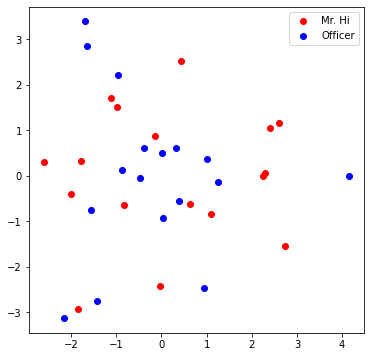

In [47]:
def visualize_emb(emb):
  X = emb.weight.data.numpy()
  pca = PCA(n_components=2)
  components = pca.fit_transform(X)
  plt.figure(figsize=(6, 6))
  club1_x = []
  club1_y = []
  club2_x = []
  club2_y = []
  for node in G.nodes(data=True):
    if node[1]['club'] == 'Mr. Hi':
      club1_x.append(components[node[0]][0])
      club1_y.append(components[node[0]][1])
    else:
      club2_x.append(components[node[0]][0])
      club2_y.append(components[node[0]][1])
  plt.scatter(club1_x, club1_y, color="red", label="Mr. Hi")
  plt.scatter(club2_x, club2_y, color="blue", label="Officer")
  plt.legend()
  plt.show()

# Visualize the initial random embeddding
if 'IS_GRADESCOPE_ENV' not in os.environ:
  visualize_emb(emb)

## Question 7: Train your first embedding model by maximizing the dot product between positive edge node pairs and minimizng the dot product between negative edge node pairs in the graph. Through training see the best performance that you can get! You should experiment with changing a few of the hyper parameters to observe the effect on training. (12.5 Points)

**NOTE**: There is no need to heavily hyper-parameter tune your model! We ask you to explore updating a couple of hyper-parameters primarily to explore their potential effects. 


In [52]:
from torch.optim import SGD

def accuracy(pred, label):
  # TODO: Implement the accuracy function. This function takes as input a 
  # pred tensor (the resulting tensor after sigmoid) and a label 
  # tensor (torch.LongTensor). Predicted values greater than 0.5 are 
  # classified as label 1, else they are classified as label 0.
  # The returned accuracy should be rounded to 4 decimal places. 
  # For example, accuracy 0.82956 will be rounded to 0.8296.

  accu = 0.0

  ############# Your code here ############
  pred_label = pred.ge(0.5)
  accu = sum(pred_label == label) / label.shape[0]
  accu =round(acc, 4)
  pass
  #########################################

  return accu

def train(emb, loss_fn, sigmoid, train_label, train_edge):
  # TODO: Train the embedding layer here. You need to implement: 
  # (1) Get the embeddings of the nodes in train_edge
  # (2) Compute the embedding dot product for each node 
  # pair (positive and negative edges)
  # (3) Feed the dot product result into sigmoid
  # (4) Feed the sigmoid output into the loss_fn
  # (5) Print both loss and accuracy of each epoch 
  # (as a sanity check, the loss should decrease during training)
  # 
  # During testing feel free to change the number of epochs and learning rate.

  epochs = 500
  learning_rate = 0.1

  optimizer = SGD(emb.parameters(), lr=learning_rate, momentum=0.9)

  for i in range(epochs):

    ############# Your code here ############
    ## Note: See the training steps above!
    create_node_emb(num_node=34, embedding_dim=16)
    pass
    #########################################

if 'IS_GRADESCOPE_ENV' not in os.environ:
  loss_fn = nn.BCELoss()
  sigmoid = nn.Sigmoid()

  # Generate the positive and negative labels
  pos_label = torch.ones(pos_edge_index.shape[1], )
  neg_label = torch.zeros(neg_edge_index.shape[1], )

  # Concat positive and negative labels into one tensor
  train_label = torch.cat([pos_label, neg_label], dim=0)

  # Concat positive and negative edges into one tensor
  # Since the network is very small, we do not split the edges into val/test sets
  train_edge = torch.cat([pos_edge_index, neg_edge_index], dim=1)
  print (train_edge)

  train(emb, loss_fn, sigmoid, train_label, train_edge)

Streaming output truncated to the last 5000 lines.
        [28, 33, 16, 29],
        [29, 32, 22, 23],
        [29, 33,  6, 15],
        [30, 32,  2, 30],
        [30, 33, 17, 23],
        [31, 32,  7,  9],
        [31, 33, 24, 29],
        [32, 33, 16, 23]])
tensor([[ 0,  1,  3,  9],
        [ 0,  2, 12, 19],
        [ 0,  3, 21, 25],
        [ 0,  4, 19, 25],
        [ 0,  5, 18, 19],
        [ 0,  6,  1, 24],
        [ 0,  7,  5, 21],
        [ 0,  8,  2, 29],
        [ 0, 10, 10, 24],
        [ 0, 11, 17, 32],
        [ 0, 12,  9, 23],
        [ 0, 13, 10, 12],
        [ 0, 17, 14, 23],
        [ 0, 19,  7, 33],
        [ 0, 21, 18, 31],
        [ 0, 31,  4, 23],
        [ 1,  2,  2, 15],
        [ 1,  3, 10, 20],
        [ 1,  7,  0, 28],
        [ 1, 13, 24, 28],
        [ 1, 17, 20, 31],
        [ 1, 19,  8, 13],
        [ 1, 21,  9, 14],
        [ 1, 30, 13, 19],
        [ 2,  3, 17, 33],
        [ 2,  7, 18, 20],
        [ 2,  8,  0, 33],
        [ 2,  9, 15, 30],
        [ 2,

## **Saving Your Model Predictions**!
After you have successfully trained your embedding model, run the cell below to save your model's predictions on the training data. The function below will generate and save a csv file called *model_predictions.csv* to the local Colab files folder. This folder can be accessed by clicking the *Folder* icon on the left panel underneath the *Table of contents*, *Find and replace*, and *Code snippets* icons. 

When submitting this Colab you will have to download your model's predictions and submit them along with your Colab ipython notebook.

In [ ]:
import pandas as pd
import numpy as np

def save_model_results(emb_model, train_label, train_edge):
  """
    Helper function to save the model predictions and data
    labels to a csv file for submission.
  """
  sigmoid = nn.Sigmoid()

  # Generate model predictions
  embedding_u = emb_model(train_edge[0])
  embedding_v = emb_model(train_edge[1])
  product = embedding_u * embedding_v

  pred = torch.sum(product, dim=1)
  pred = sigmoid(pred).detach()

  # Create a pandas datafram with columns
  # model_pred | binary_pred | label
  data = {}
  data['model_pred'] = pred
  data['binary_pred'] = np.where(pred > 0.5, 1.0, 0.0)
  data['label'] = train_label.detach()

  df = pd.DataFrame(data=data)
  # Save to csv
  df.to_csv('model_predictions.csv', sep=',', index=False)

if 'IS_GRADESCOPE_ENV' not in os.environ:
  save_model_results(emb, train_label, train_edge)

## Visualize the final node embeddings
Now you can visually compare our embeddings with the embeddings before training. After training, you should oberserve that the two classes are more evidently separated. Note that since we are reducing the dimensionality of our embeddings from **16 --> 2** you may not see perfect linear sepeartion.


Overall, visualizing model / node embeddings is a great sanity check for your implementation, in addition to tracking the model's accuracy. 

In [ ]:
# Visualize the final learned embedding
if 'IS_GRADESCOPE_ENV' not in os.environ:
  visualize_emb(emb)

# Submission

You will need to submit two files on Gradescope to complete this notebook. 

1.   Your completed *XCS224W_Colab1.ipynb*. From the "File" menu select "Download .ipynb" to save a local copy of your completed Colab. 
2.   Your model predictions. Open up the local Colab file folder (by selecting the Folder icon on the left panel) and download *model_predictions.csv* 

For submitting your work, zip the files downloaded in steps 1 and 2 above and submit to gradescope. **NOTE:** DO NOT rename any of the downloaded files. The file names should be *XCS224W_Colab1.ipynb* and *model_predictions.csv*.

